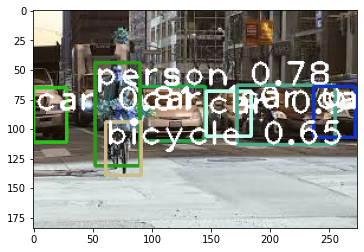

In [23]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

net = cv2.dnn.readNet('yolov3.weights', 'yolov3.cfg')
classes = [] ## empty list of python
with open('coco.names', 'r') as f:
    classes = f.read().splitlines()
    
img = cv2.imread("sample.jpg")
height, width, _ = img.shape

blob = cv2.dnn.blobFromImage(img, 1/255, (416, 416), (0, 0, 0), swapRB=True, crop=False)

net.setInput(blob)

output_layers_names = net.getUnconnectedOutLayersNames()
layerOutputs = net.forward(output_layers_names)

boxes = []
confidences =[]
classids = []

for output in layerOutputs:
    for detection in output:
        scores = detection[5:]
        classid = np.argmax(scores)
        confidence = scores[classid]
        if confidence>0.5:
            center_x = int(detection[0]*width)
            center_y = int(detection[1]*height)
            w = int(detection[2]*width)
            h = int(detection[3]*height)
            
            x = int(center_x - w/2)
            y = int(center_y - h/2)
            
            boxes.append([x, y, w, h])
            confidences.append((float(confidence)))
            classids.append(classid)

indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)

font = cv2.FONT_HERSHEY_PLAIN
colors = np.random.uniform(0, 255, size=(len(boxes), 3))

for i in indexes.flatten():
    x, y, w, h = boxes[i]
    label = str(classes[classids[i]])
    confidence = str(round(confidences[i],2))
    color = colors[i]
    cv2.rectangle(img, (x,y), (x+w, y+h), color, 2)
    cv2.putText(img, label + " " + confidence, (x, y+20), font, 2, (255,255,255), 2)

cv2.imshow("Image", img)
cv2.waitKey(0)
cv2.destroyAllWindows()
plt.imshow(img) ## bgr